In [1]:
import pandas as pd
from fbprophet import Prophet

In [2]:
df = pd.read_csv('Data/airline_passengers.csv')
df.head()

,Month,Thousands of Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [3]:
df.columns = ['ds', 'y']
df['ds'] = pd.to_datetime(df['ds'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      144 non-null    datetime64[ns]
 1   y       144 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 2.4 KB


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       401.676    0.00248188       124.093           1           1      130   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     154       401.792   1.91059e-05       67.6826   2.615e-07       0.001      236  LS failed, Hessian reset 
     199       401.842   1.99481e-06       78.1035      0.3182           1      299   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       401.956   6.67299e-05       66.9014      0.4778      0.4778      423   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     323       401.966   5.51811e-05       74.7346   6.825e-07       0.001      489  LS failed, Hessian reset 
     374        401.97   3.36142e-06       61.4595   5.697e-08       0.001      601  LS failed, Hessian rese

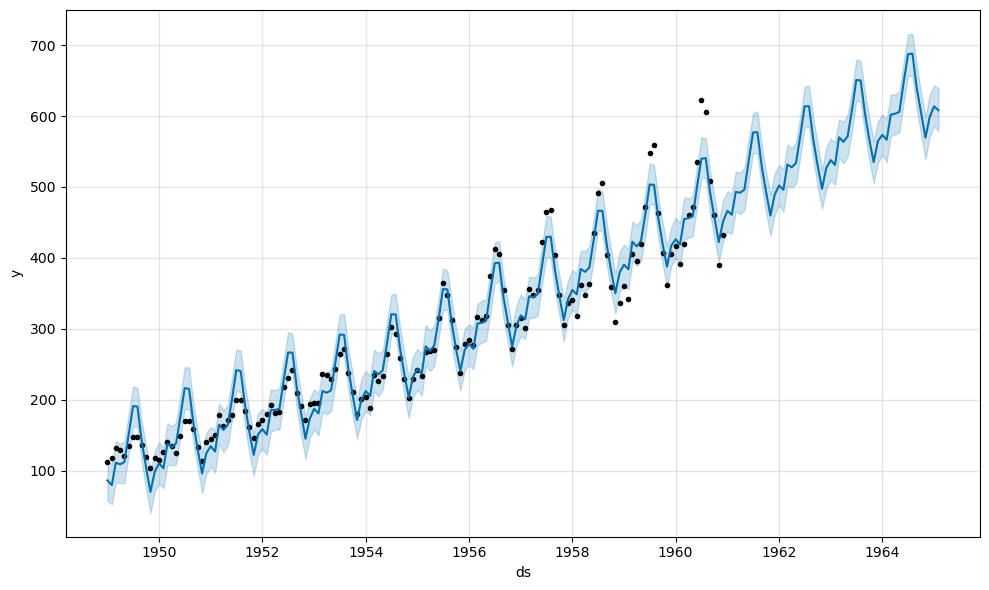

In [4]:
m = Prophet()
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


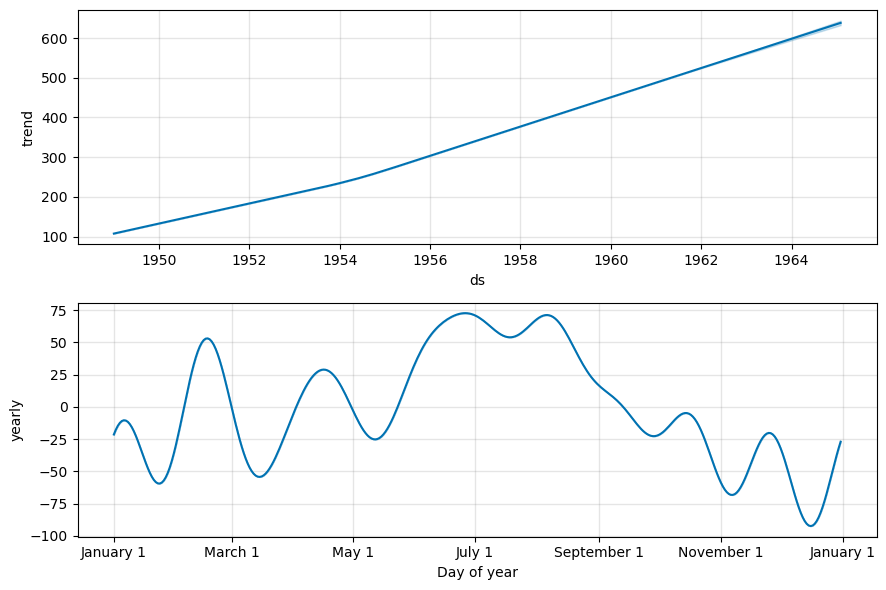

In [6]:
fig = m.plot_components(forecast);

In [7]:
from fbprophet.plot import add_changepoints_to_plot

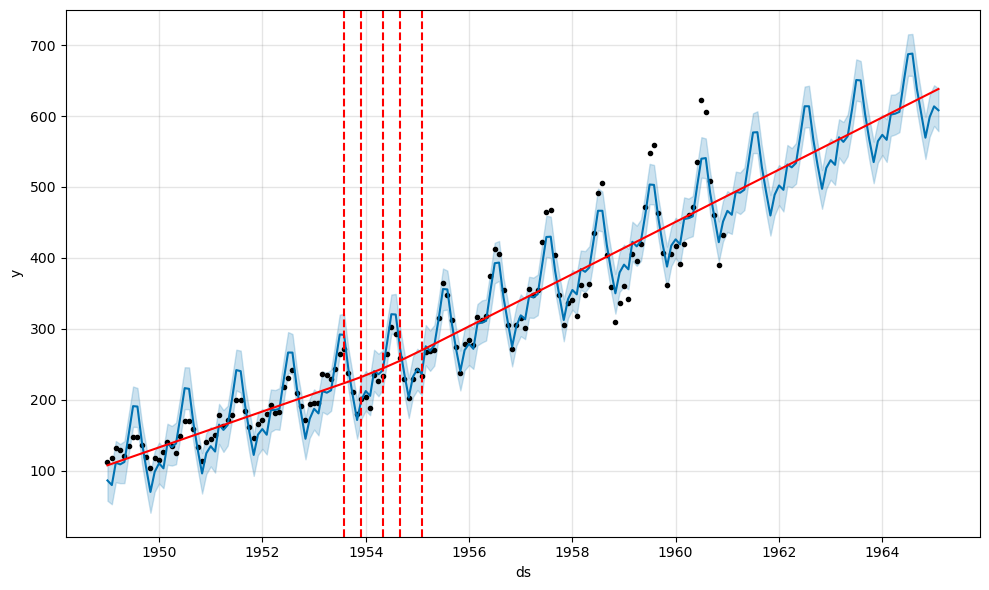

In [8]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

## 곰셈 모델

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)


Initial log joint probability = -2.46502
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       501.631   0.000271656       116.519      0.1167      0.7248      137   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       503.282   0.000365604         81.42      0.8252      0.8252      266   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     267        503.37   0.000224801       78.5492   2.737e-06       0.001      382  LS failed, Hessian reset 
     299       503.402   1.59527e-05       78.1168      0.7402      0.7402      426   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       503.474     0.0022841       99.0586           1           1      542   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     487       503.551   8.13516e-06    

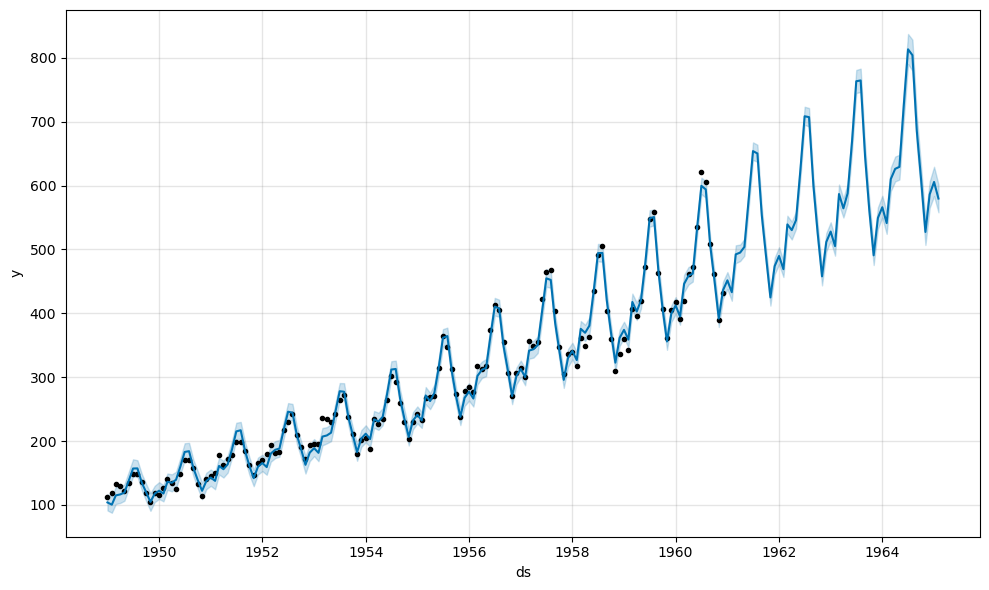

In [9]:
m = Prophet(seasonality_mode='multiplicative')
m.fit(df)
future = m.make_future_dataframe(50, freq='MS')
forecast = m.predict(future)
fig = m.plot(forecast)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/forecaster.py:891: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  components = components.append(new_comp)
/opt/homebrew/anaconda3/lib/python3.9/site-packages/fbprophet/plot.py:422: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(yticklabels)


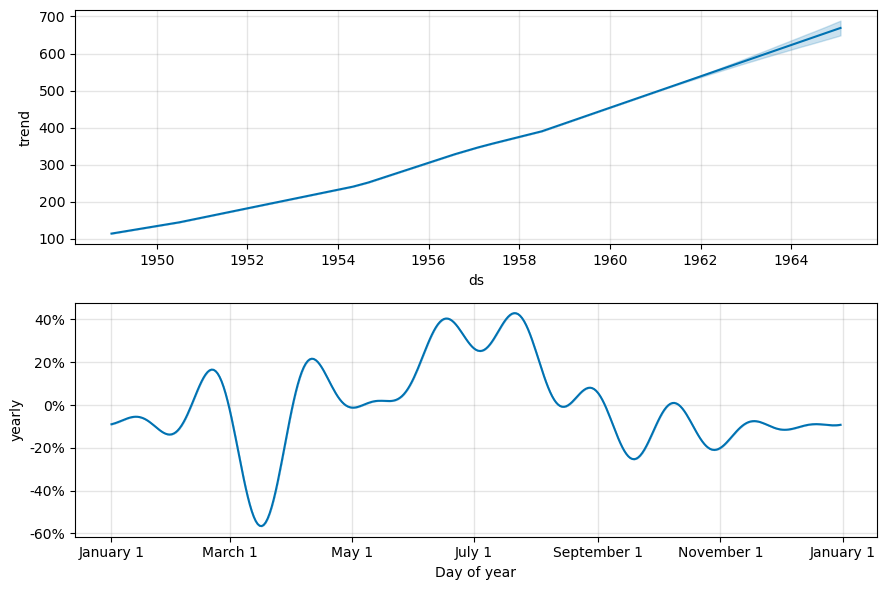

In [10]:
fig = m.plot_components(forecast);

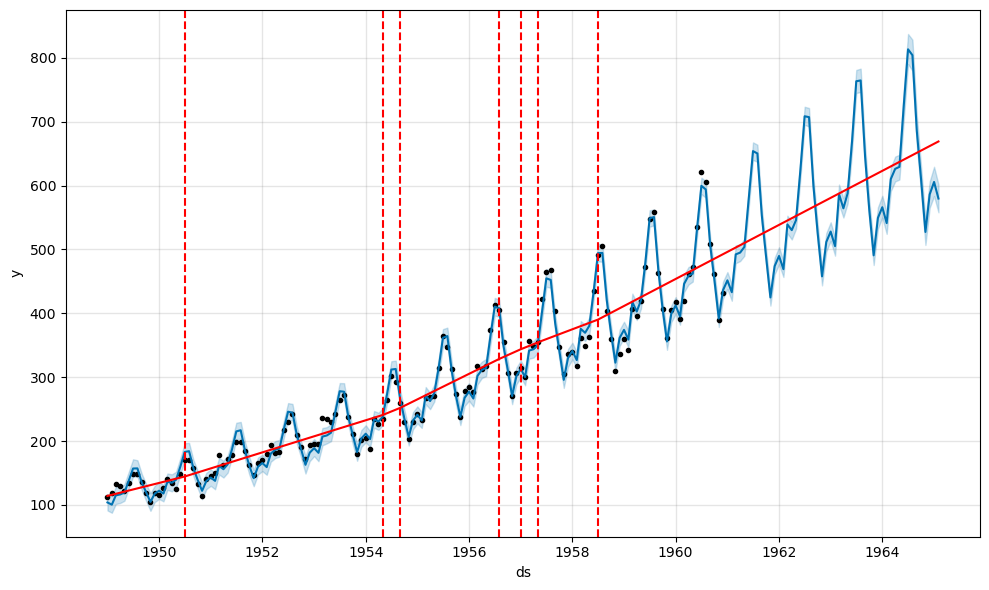

In [11]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)